In [15]:
from __future__ import print_function, division
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from scipy import linalg
from smt.utils import compute_rms_error

from smt.problems import Sphere, NdimRobotArm, Rosenbrock
from smt.sampling_methods import LHS
from smt.surrogate_models import LS, QP, KPLS, KRG, KPLSK, GEKPLS, MGP
try:
    from smt.surrogate_models import IDW, RBF, RMTC, RMTB
    compiled_available = True
except:
    compiled_available = False

try:
    import matplotlib.pyplot as plt
    plot_status = True
except:
    plot_status = False

import scipy.interpolate
import datetime
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
plt.matplotlib.style.use("seaborn")

In [19]:
log_data = pd.read_csv("../utilities/20220125/log4dfree.csv", names=["id","start","end","vmax","num-peds","num-cars","num-cross","in","out","time"])
log = log_data.values

In [4]:
log_size =10000 + 1
log_min = log[0:log_size,:]

In [5]:
sm_input = log_min[:,[3,4,5,6,9]]

In [8]:
sm_input_train,sm_input_test = train_test_split(sm_input , test_size = 0.4)

In [10]:
xt = sm_input_train[:,0:4].astype(float)
yt = sm_input_train[:,4].astype(float)
xtest = sm_input_test[:,0:4].astype(float) 
ytest = sm_input_test[:,4].astype(float) 
# print(xt,yt)

In [13]:
tKRG = KRG(theta0=[1e-2]*4,print_prediction = False)
tKRG.set_training_values(xt,yt)

tKRG.train()

___________________________________________________________________________
   
                                  Kriging
___________________________________________________________________________
   
 Problem size
   
      # training points.        : 6000
   
___________________________________________________________________________
   
 Training
   
   Training ...
exception :  935-th leading minor of the array is not positive definite
exception :  949-th leading minor of the array is not positive definite
exception :  963-th leading minor of the array is not positive definite
exception :  957-th leading minor of the array is not positive definite
exception :  959-th leading minor of the array is not positive definite
exception :  3759-th leading minor of the array is not positive definite
exception :  4605-th leading minor of the array is not positive definite
exception :  4672-th leading minor of the array is not positive definite
exception :  5990-th leading minor of the array 

KRG,  err: 62.03291541567372


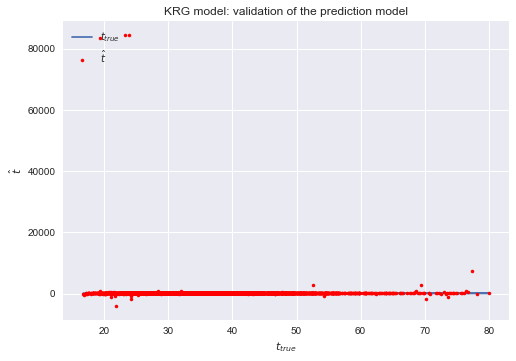

In [16]:
y = tKRG.predict_values(xtest)
print('KRG,  err: '+str(compute_rms_error(tKRG,xtest,ytest)))


if plot_status:

    fig = plt.figure()
    plt.plot(ytest, ytest, '-', label='$t_{true}$')
    plt.plot(ytest, y, 'r.', label='$\hat{t}$')
       
    plt.xlabel('$t_{true}$')
    plt.ylabel('$\hat{t}$')
        
    plt.legend(loc='upper left')
    plt.title('KRG model: validation of the prediction model')

In [23]:
log_data.head()

,id,start,end,vmax,num-peds,num-cars,num-cross,in,out,time
0,0,(patch 38 3),(patch 96 41),0.034679,19,0,1,0,2638,21.983333
1,16,(patch 3 42),(patch 38 3),0.027851,19,0,0,0,2744,22.866667
2,17,(patch 59 3),(patch 3 42),0.032870,19,0,1,0,2827,23.558333
3,2,(patch 3 40),(patch 96 42),0.028827,19,0,1,0,3219,26.825000
4,8,(patch 96 41),(patch 38 3),0.028878,19,0,1,0,3281,27.341667


In [26]:
ld = log_data.drop(['id','start','end','in','out'],axis=1)
ld.cov()

,vmax,num-peds,num-cars,num-cross,time
vmax,2.306629e-05,-5.833175e-08,-0.000010,0.000020,-0.035599
num-peds,-5.833175e-08,9.476194e+00,1.870017,0.004688,0.163908
num-cars,-9.608614e-06,1.870017e+00,2.473432,-0.004482,-0.124128
num-cross,2.016121e-05,4.688020e-03,-0.004482,0.471377,3.782050
time,-3.559908e-02,1.639084e-01,-0.124128,3.782050,99.844600
